# Text Classifier on Good Read Reviews Using SGD Classifier

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

import warnings
warnings.filterwarnings('ignore')

In [2]:
 good_reads = pd.read_csv('goodreads.tsv' , sep='\t') #names=['user_id','song_id','play_count'])

In [3]:
#Dropping Null Values
good_reads=good_reads.dropna()

In [4]:
#Chaning review data of every row into string type
for i in range(0,len(good_reads)-1):
    if type(good_reads.iloc[i]['body']) != str:
        good_reads.iloc[i]['body'] = str(good_reads.iloc[i]['body'])

In [5]:
#function to represent sentiment 0(negeative);1(positive)
def sentiment(n):
    return 1 if n>=4 else (-1 if n<=2 else 0)

In [6]:
#Applying Sentiment Function to our Data Frame
good_reads['sentiment'] = good_reads['rating'].apply(sentiment)

## Data Cleaning

In [7]:
# Applyling some pre-processing on the given text.
import re


def clean_text(text):
    """
    Steps :
    - Removing HTML tags
    - Removing punctuation
    - Lowering text
    """
    
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)    
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    return text

In [8]:
X = []
sentences = list(good_reads['body'])
for sen in sentences:
    X.append(clean_text(sen))

In [9]:
good_reads['review']=X

In [10]:
good_reads.drop('body',
  axis='columns', inplace=True)

In [11]:
from textblob import TextBlob

In [12]:
good_reads['polarity'] = good_reads['review'].map(lambda text: TextBlob(text).sentiment.polarity)

In [13]:
good_reads['review_len'] = good_reads['review'].astype(str).apply(len)
good_reads['word_count'] = good_reads['review'].apply(lambda x: len(str(x).split()))

In [14]:
print('10 random reviews with the highest positive sentiment polarity: \n')
cl = good_reads.loc[good_reads.polarity == 1, ['review']].sample(10).values
for c in cl:
    print(c[0])

10 random reviews with the highest positive sentiment polarity: 

read for the booktube prize   octofinals nonfiction excellent reflections on race and immigration 4 5 
excellent 
an excellent read on intersectional feminism and how being a feminist requires fighting for all women and all issues that effect women  would recommend everyone reads 
maybe the best gray man book yet 
finished it in two reads  excellent 
this is what i wanted tros to be  its perfect 
gray man at his best 
each prayer  each meditation written by women who understand the importance of authenticity when speaking to god  this is the best prayer book ive ever read 
another wonderful effort from this author
i am now the best sing writer of all time


In [15]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = good_reads.loc[good_reads.polarity == 0, ['review']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

3 5 stars
veronica and stoker discover that the female mountain climber was murdered  stoker wants no part of finding the killer but veronica is bored and is asked to impersonate the missing princess  another entertaining book in the series 
we all come from some type of dysfunctional family  lots of characters and scenarios to think about  however not one stuck out for me  some wisdom that comes from weathering all kinds of storms with your family  but at 52   i may not have needed this story to tell me that 
what a delight  listen  you wanna read dostoevsky  wait for katya to write a book in bed 
jeff  thank you for your advice  encouragement  tips and above all sharing your time  and experience through this book  oh  and also for hipping me to mountain man 


In [16]:
print('2 reviews with the most negative polarity: \n')
cl = good_reads.loc[good_reads.polarity == -1, ['review']].sample(2).values
for c in cl:
    print(c[0])

2 reviews with the most negative polarity: 

what a terrible book 
this was one of the worst books i’ve ever read 


In [17]:
good_reads.head(2)

,title,date,rating,sentiment,review,polarity,review_len,word_count
0,The Body: A Guide for Occupants,"Oct 11, 2019",5.0,1,lovingly presented with humour and kindness an...,0.233333,325,58
1,Resistance Reborn,"Feb 28, 2020",4.0,1,i read through this book quicker than anticipa...,0.117411,1570,251


In [18]:
new = good_reads["date"].str.split(",", n = 1, expand = True) 
# making separate date column from new data frame 
good_reads["day"]= new[0] 
  
# making separate year column from new data frame 
good_reads["year"]= new[1] 

In [19]:
good_reads=good_reads.drop(['date'], axis=1)

In [20]:
new1 = good_reads["day"].str.split(" ", n = 1, expand = True) 
  
# adding month to the main dataset 
good_reads["month"]= new1[0] 
  
# adding day to the main dataset 
good_reads["date"]= new1[1] 

good_reads=good_reads.drop(['day'], axis=1)
good_reads.head()

,title,rating,sentiment,review,polarity,review_len,word_count,year,month,date
0,The Body: A Guide for Occupants,5.0,1,lovingly presented with humour and kindness an...,0.233333,325,58,2019,Oct,11
1,Resistance Reborn,4.0,1,i read through this book quicker than anticipa...,0.117411,1570,251,2020,Feb,28
2,The Book of Two Ways,4.0,1,jodi picoult does it again in this new novel ...,0.151515,292,58,2020,Jul,13
3,How to Write One Song: Loving the Things We Cr...,4.0,1,i’m a music freak without a shred of musical a...,0.459524,587,104,2021,Feb,21
4,The Giver of Stars,4.0,1,the giver of stars by jojo moyes won the book ...,0.167302,2662,486,2020,Sep,08


# Distribution of Ratings

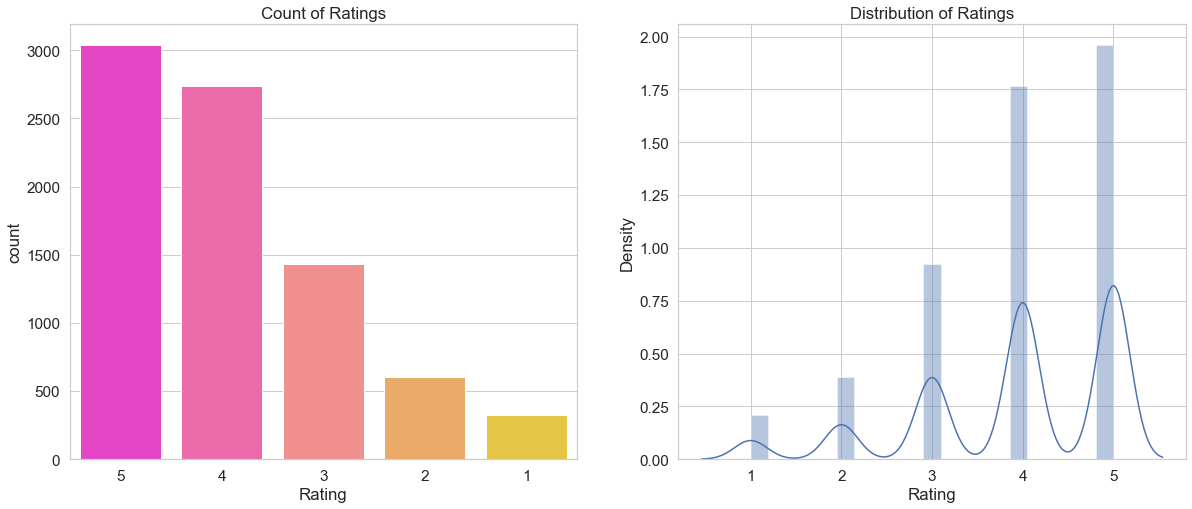

In [41]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(good_reads['rating'], palette = 'spring', order = list(range(5, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(good_reads['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating");

# Distribution of Sentiment

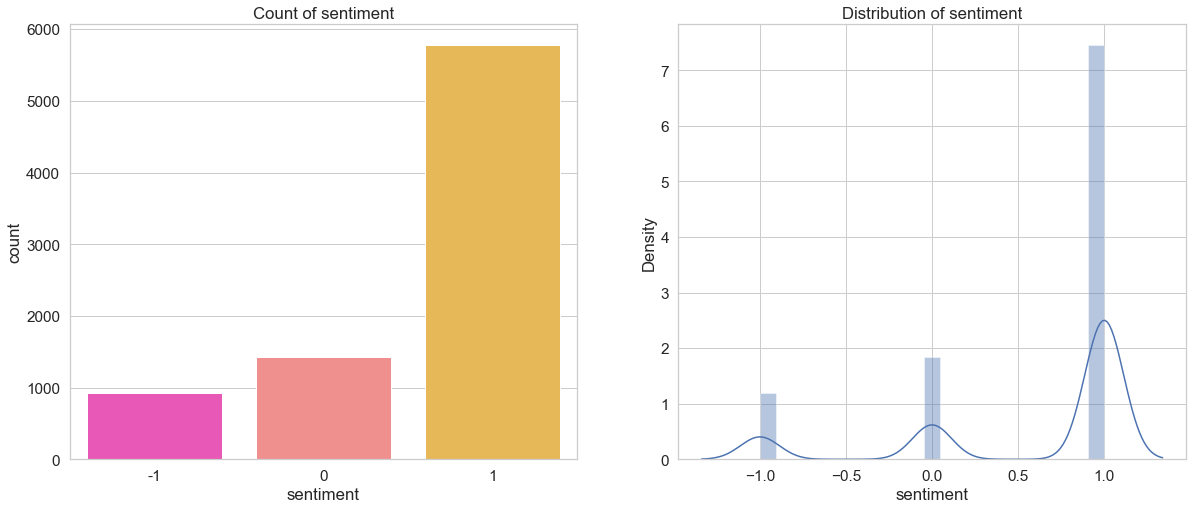

In [40]:
# A countplot of the sentiment so we can see the distribution of the sentiment
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(good_reads['sentiment'], palette = 'spring', order = list(range(-1,2)), ax = ax[0])
sns_2 = sns.distplot(good_reads['sentiment'], ax = ax[1])
sns_1.set_title('Count of sentiment')
sns_1.set_xlabel("sentiment")

sns_2.set_title('Distribution of sentiment')
sns_2.set_xlabel("sentiment");

# Sentiment Polarity Distribution

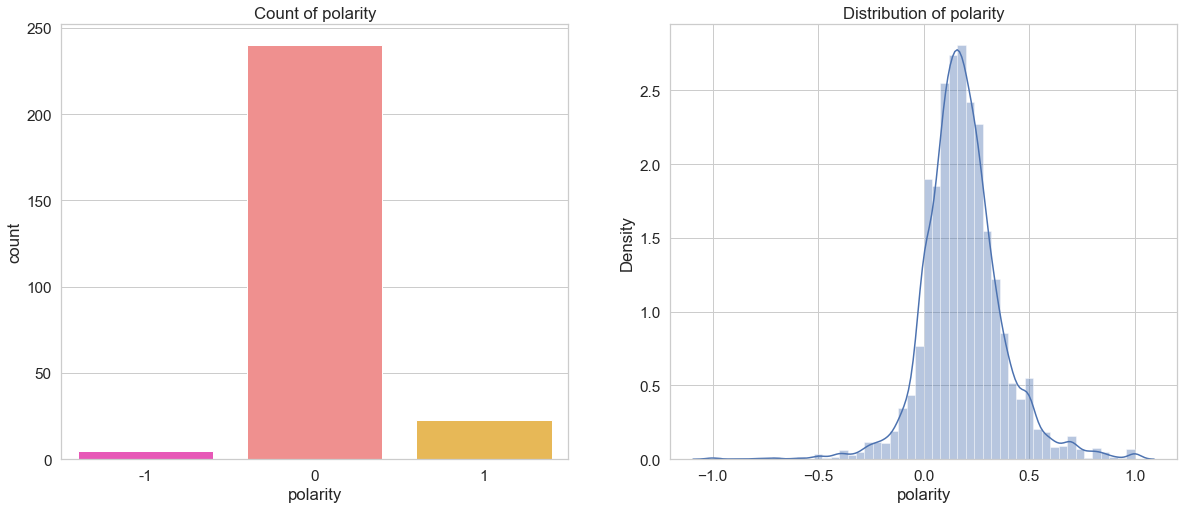

In [39]:
# A countplot of the polarity so we can see the distribution of the polarity
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(good_reads['polarity'], palette = 'spring', order = list(range(-1,2)), ax = ax[0])
sns_2 = sns.distplot(good_reads['polarity'], ax = ax[1])
sns_1.set_title('Count of polarity')
sns_1.set_xlabel("polarity")

sns_2.set_title('Distribution of polarity')
sns_2.set_xlabel("polarity");

Vast majority of the sentiment polarity scores are greater than zero, means most of them are pretty positive.

# Review Text Length Distribution

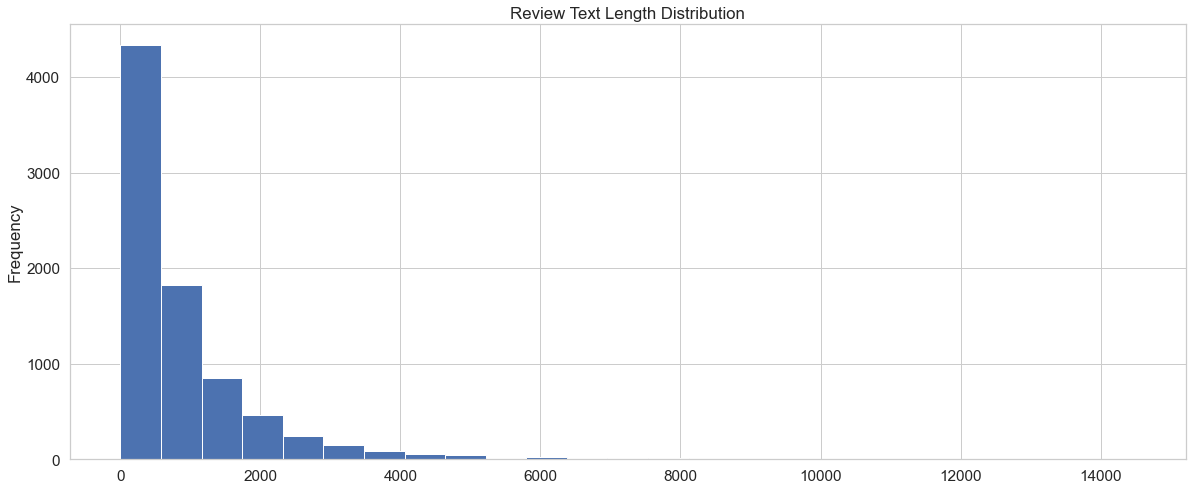

In [24]:
good_reads['review_len'].plot(
    kind='hist',bins=25,
    title='Review Text Length Distribution');

## Actual Mean and Median Polarity Of Reviews Per Month

In [25]:
df = pd.DataFrame(good_reads.groupby('month')['polarity'].mean())
df

,polarity
month,
Apr,0.187368
Aug,0.170083
Dec,0.193773
Feb,0.200587
Jan,0.186094
Jul,0.177033
Jun,0.170381
Mar,0.202133
May,0.190620


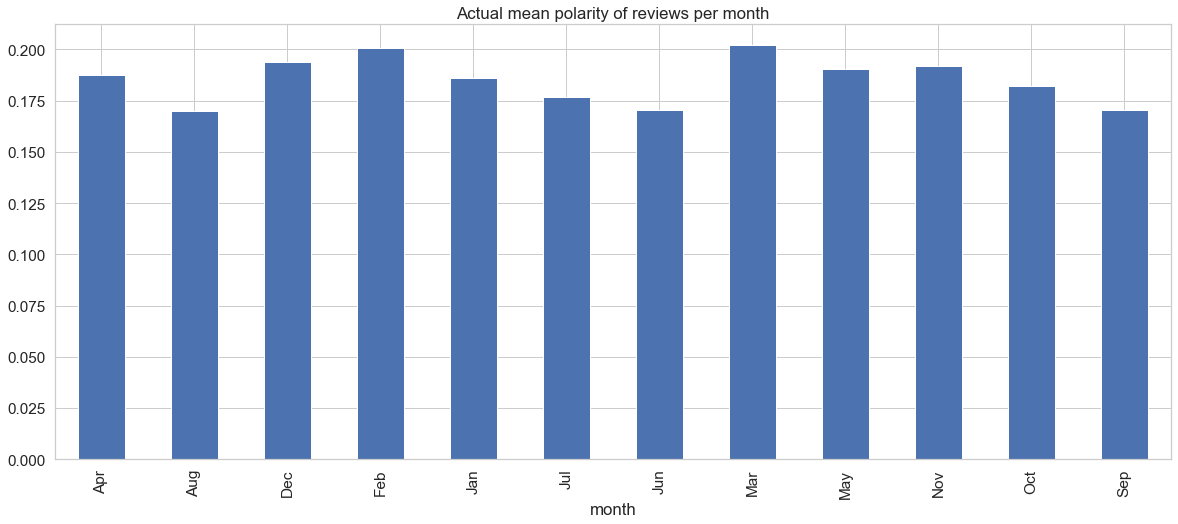

In [26]:
df['polarity'].plot(
    kind='bar',
    title='Actual mean polarity of reviews per month');

In [27]:
df2 = pd.DataFrame(good_reads.groupby('month')['polarity'].median())
df2

,polarity
month,
Apr,0.186372
Aug,0.157872
Dec,0.180361
Feb,0.183333
Jan,0.183153
Jul,0.172632
Jun,0.150000
Mar,0.178211
May,0.178323


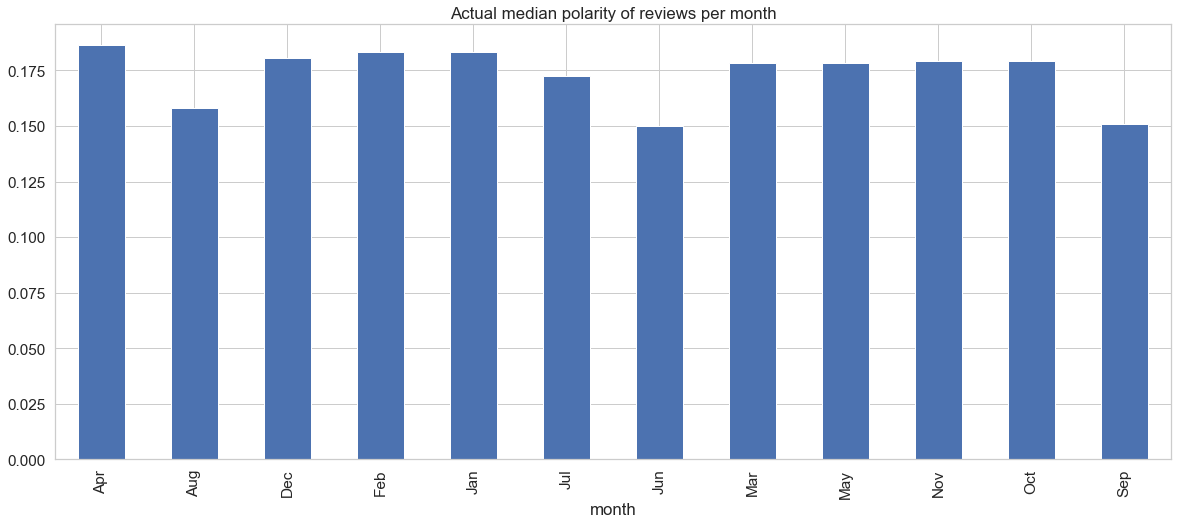

In [28]:
df2['polarity'].plot(
    kind='bar',
    title='Actual median polarity of reviews per month');

# Top 10 Most Reviewed Books 

In [29]:
rating = dict(good_reads.loc[good_reads.rating == 5, "title"].value_counts())

In [30]:
title = list(rating.keys())
book_rating = list(rating.values())

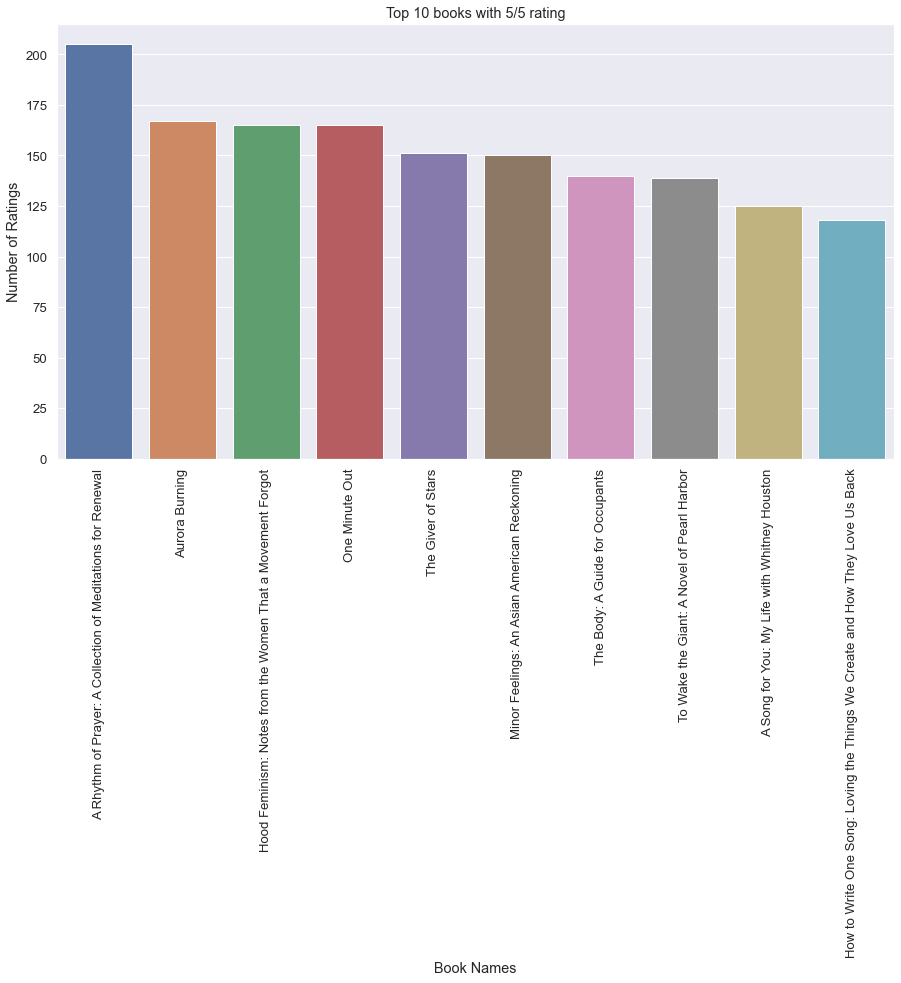

In [31]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

sns_rating = sns.barplot(x = title[0:10], y = book_rating[0:10])

sns_rating.set_title('Top 10 books with 5/5 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Book Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

# Year and Month Wise Review Count

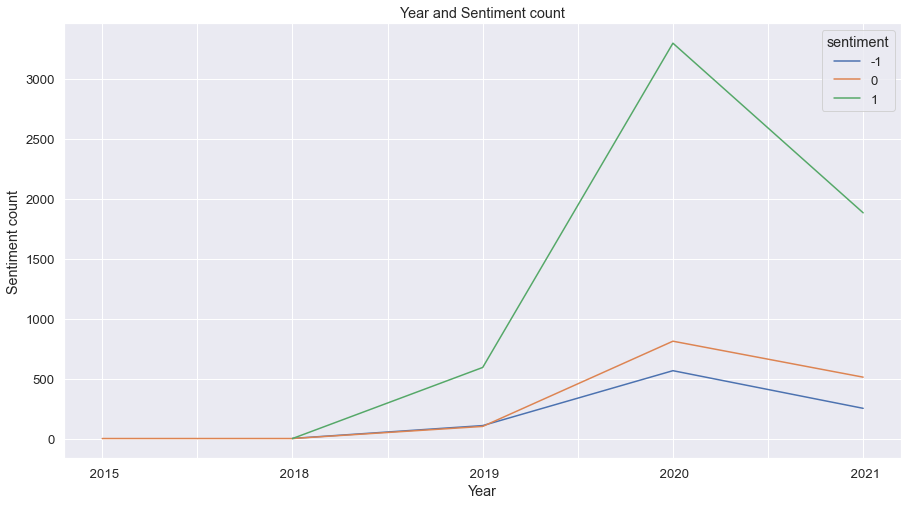

In [32]:
good_reads.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

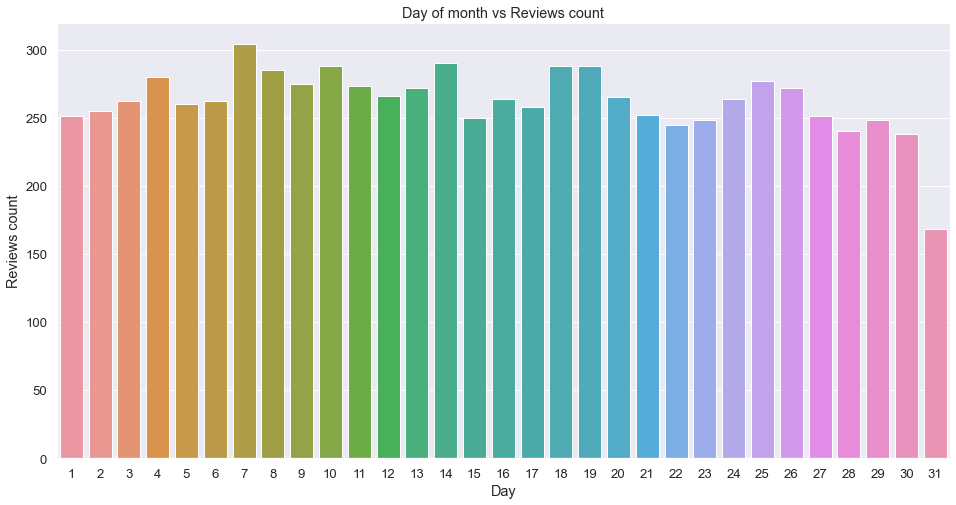

In [33]:
#Day of month vs Reviews count
day=pd.DataFrame(good_reads.groupby('date')['review'].count()).reset_index()
day['date']=day['date'].astype('int64')
day.sort_values(by=['date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x="date", y="review", data=day)
plt.title('Day of month vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

# Word Cloud

In [34]:
review_pos = good_reads[good_reads["sentiment"]==1]

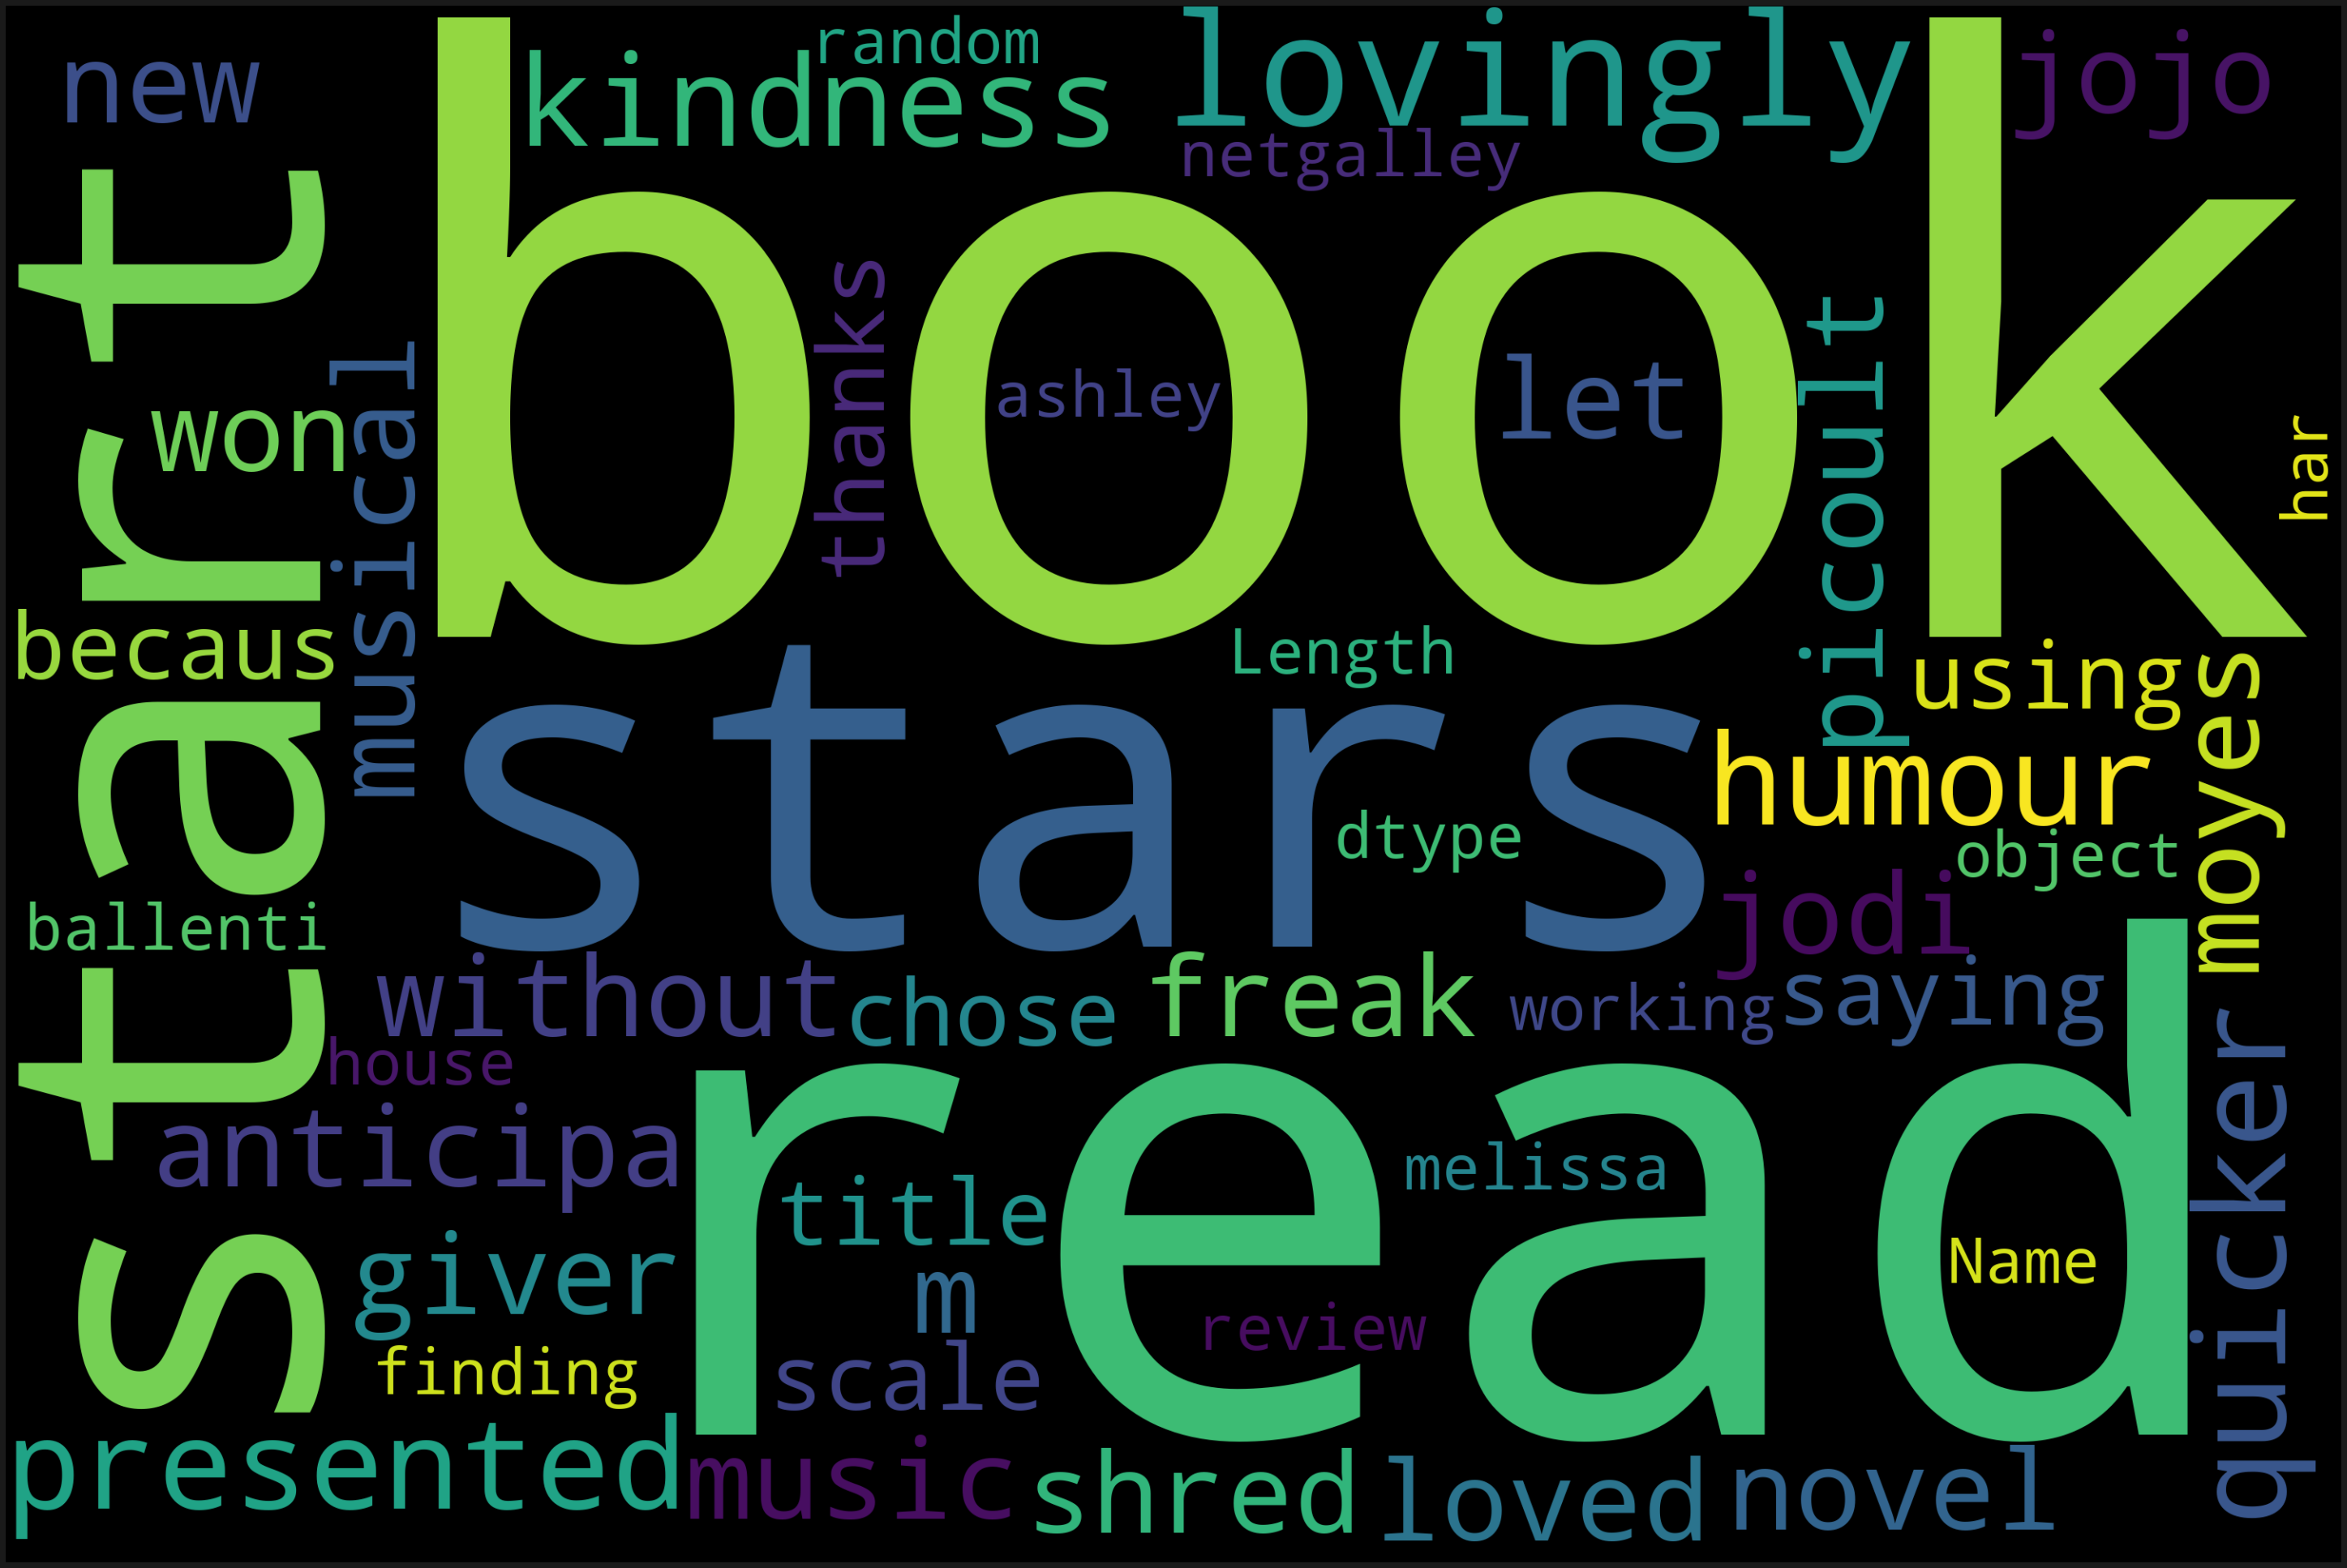

In [35]:
text = review_pos["review"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [36]:
review_neg = good_reads[good_reads["sentiment"]==0]

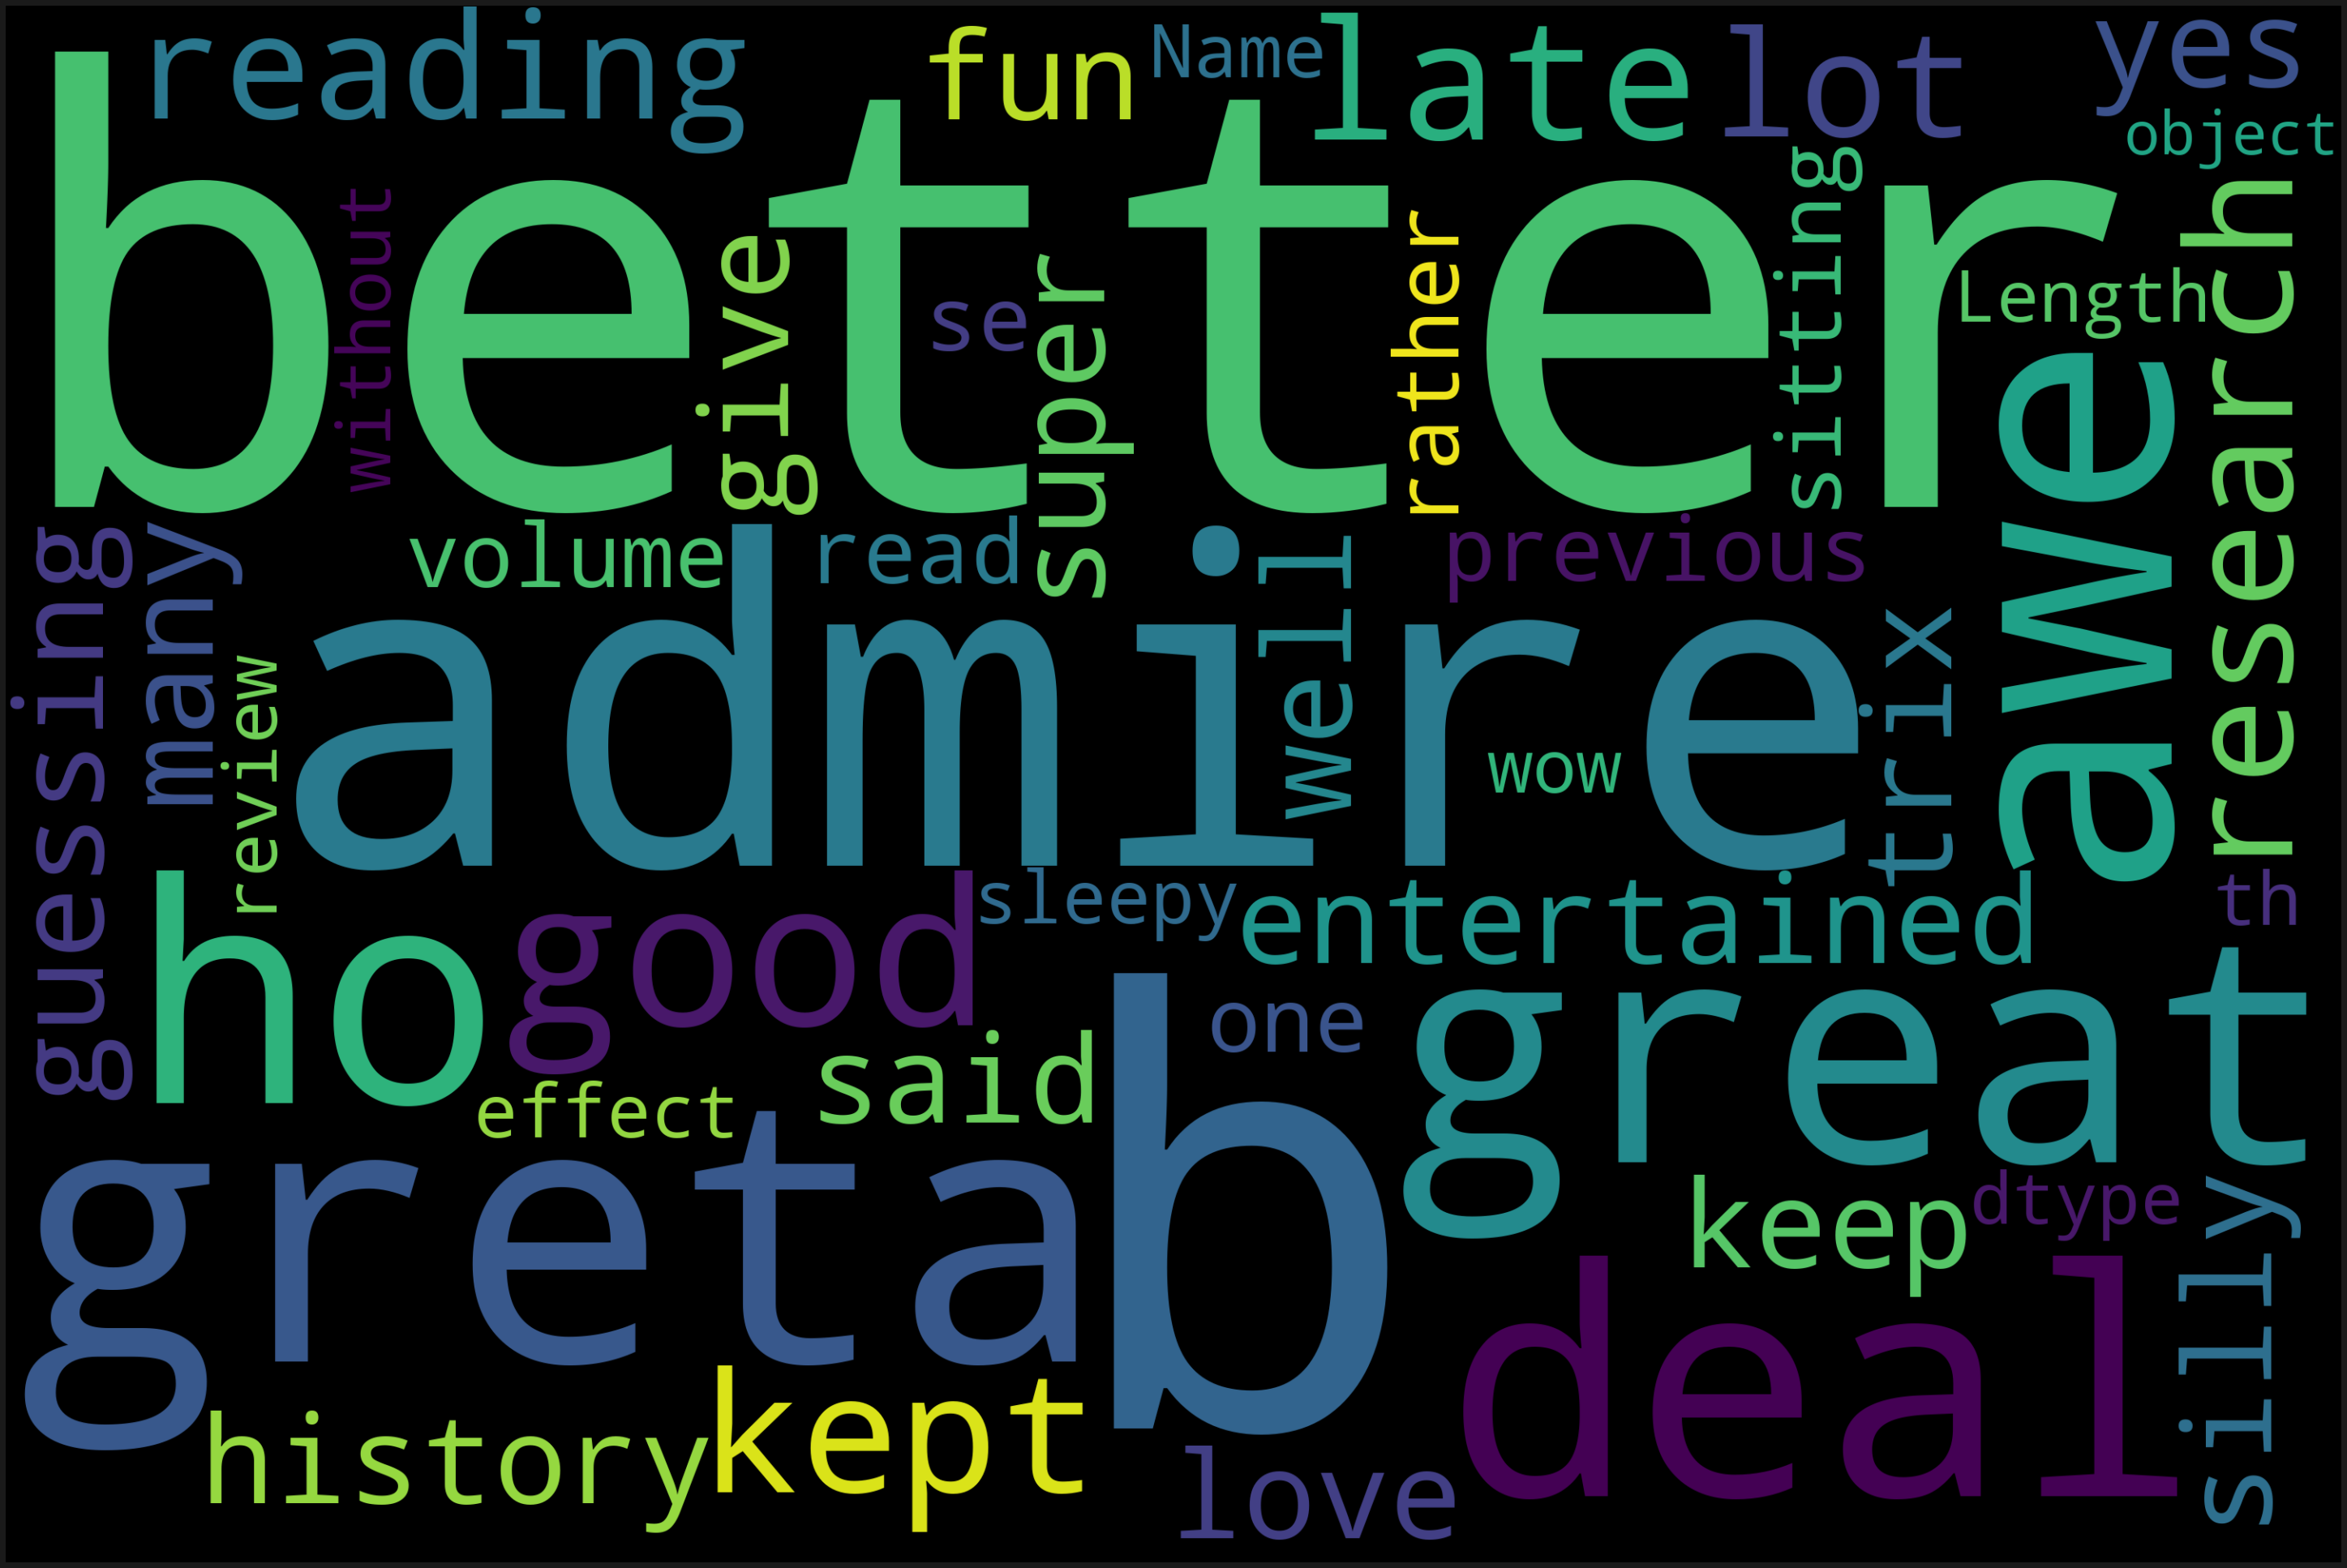

In [37]:
text = review_neg["review"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()